### Assignment  37: Statistics Advance 6 - Kundan Kumar

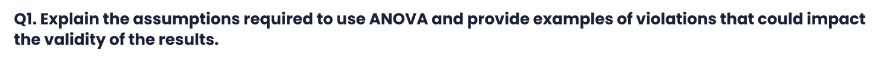

ANSWER:

#### Assumptions of ANOVA:

1. **Normality:** The data should be normally distributed in each group. Violations of this assumption can occur when the data is skewed, has extreme outliers, or is bimodal.

2. **Homogeneity of variance:** The variance within each group should be approximately equal. This assumption is also known as the assumption of homoscedasticity. Violations of this assumption can occur when the variance in one group is much larger than the variance in another group.

3. **Independence:** The observations should be independent of each other. Violations of this assumption can occur when there are dependencies between observations, such as when repeated measurements are taken on the same individual.

#### Violations that could impact the validity of the results:

1. **Non-normality:** If the data is not normally distributed in each group, the results of the ANOVA may not be reliable. For example, if the data is skewed, a transformation of the data or a non-parametric test may be necessary.

2. **Heteroscedasticity:** If the variance within each group is not approximately equal, the results of the ANOVA may be biased. For example, if the variance in one group is much larger than the variance in another group, the results may be driven by the group with the larger variance.

3. **Dependence:** If the observations are not independent of each other, the results of the ANOVA may be unreliable. For example, if repeated measurements are taken on the same individual, the observations within each group may be more similar than the observations between groups, leading to an overestimate of the differences between groups.

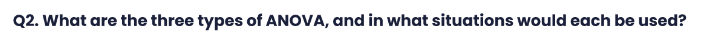

ANSWER:

**There are three main types of ANOVA:**

1. **One-way ANOVA:** One-way ANOVA is used when there is one independent variable (also called a factor) with three or more levels or groups, and the dependent variable is continuous. It is used to test whether there are any significant differences in the means of the dependent variable across the different levels or groups of the independent variable. For example, a one-way ANOVA could be used to test whether there are any differences in the mean weight of people across three different diet plans.

2. **Two-way ANOVA:** Two-way ANOVA is used when there are two independent variables (also called factors), and the dependent variable is continuous. It is used to test for main effects of each independent variable, as well as any interaction effects between the independent variables. For example, a two-way ANOVA could be used to test whether there are any differences in the mean weight of people across three different diet plans and two different exercise routines.

3. **Repeated measures ANOVA:** Repeated measures ANOVA is used when the dependent variable is measured on the same subjects at different time points, or under different conditions. It is used to test whether there are any significant differences in the means of the dependent variable across the different time points or conditions. For example, a repeated measures ANOVA could be used to test whether there are any differences in the mean anxiety levels of participants before and after a stress-inducing task.

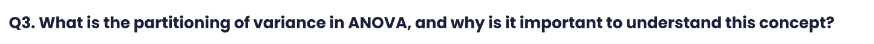

ANSWER:

**Partitioning of variance** in ANOVA refers to the process of dividing the total variation in a dependent variable into different sources of variation. The goal of ANOVA is to determine whether there are significant differences in means between groups or conditions, and partitioning of variance helps to identify the sources of variation that contribute to these differences.

In ANOVA, the total variation in the dependent variable is partitioned into two types of variation:

1. Between-group variation
2. Within-group variation

By partitioning the variation in this way, ANOVA can test whether the between-group variation is significantly greater than the within-group variation, which would indicate that the groups or conditions being compared are significantly different.

**Understanding partitioning of variance is important** because it allows researchers to determine which sources of variation are most important in explaining the differences in means between groups or conditions. This can help to identify factors that are driving the observed differences and can inform further research or intervention efforts. Additionally, partitioning of variance can help to identify any sources of error or variability in the data, which can improve the reliability and validity of the results.

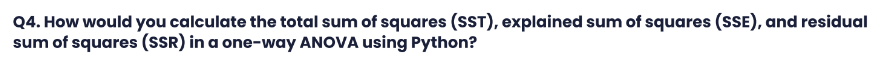

In [6]:
import numpy as np
import pandas as pd
from scipy import stats

#generate random data
np.random.seed(123)
data = pd.DataFrame({'group': np.random.choice(['A', 'B', 'C'], size=90),
                     'value': np.random.normal(loc=10, scale=2, size=90)})

group_means = data.groupby('group')['value'].mean()
grand_mean = data['value'].mean()
SST = ((data['value'] - grand_mean) ** 2).sum()
SSE = ((group_means - grand_mean) ** 2 * data['group'].value_counts()).sum()
SSR = SST - SSE

print("SST:", SST)
print("SSE:", SSE)
print("SSR:", SSR)

SST: 442.2002734739364
SSE: 29.999927882554047
SSR: 412.20034559138236


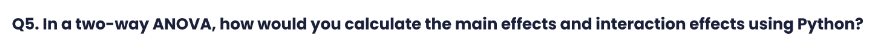

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

np.random.seed(123)
df = pd.DataFrame({'A': np.repeat(['a', 'b'], 25),
                   'B': np.repeat(['x', 'y'], 25),
                   'score': np.random.normal(0, 1, 50)})

model = ols('score ~ A + B + A:B', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

main_effects = anova_table[['sum_sq', 'df', 'F']].iloc[:2]
interaction_effect = anova_table[['sum_sq', 'df', 'F']].iloc[2]

print('Main Effects:')
print(main_effects)
print('\nInteraction Effect:')
print(interaction_effect)


Main Effects:
     sum_sq   df         F
A  0.554747  1.0  0.380639
B  0.554747  1.0  0.380639

Interaction Effect:
sum_sq    0.804310
df        1.000000
F         0.551875
Name: A:B, dtype: float64


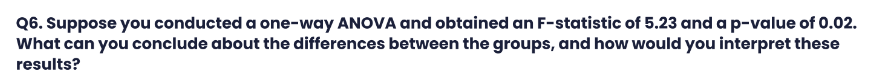

ANSWER:

If a one-way ANOVA yields an F-statistic of 5.23 and a p-value of 0.02, it means that there is evidence of a significant difference between the groups. Specifically, it means that the variance between the groups is greater than the variance within the groups, which suggests that there are significant differences in the means of the groups and we can conclude that at least one group has a mean that is significantly different from the others.

However, we cannot determine which specific groups are different from each other based solely on the ANOVA results. Further analysis, such as post-hoc tests or confidence intervals, may be needed to determine the nature of the differences between the groups.

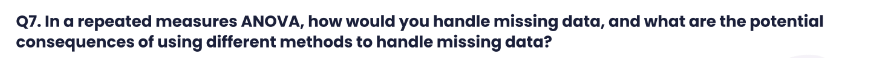

ANSWER:

Handling missing data in a repeated measures ANOVA can be challenging, as the repeated nature of the design means that missing data can have a more profound impact on the analysis than in other designs. There are several methods for handling missing data in a repeated measures ANOVA, including:

**Pairwise deletion:** This method involves omitting any cases with missing data for a particular variable, only using cases that have complete data for that variable. This method is easy to implement, but it can result in a loss of statistical power and can produce biased estimates if the missing data is not missing completely at random.

**Listwise deletion:** This method involves omitting any cases that have missing data for any of the variables included in the analysis. This method avoids the potential bias of pairwise deletion, but it can also lead to a loss of statistical power if a substantial portion of the data is missing.

**Imputation:** This method involves replacing missing data with estimated values based on the available data. There are several imputation methods, including mean imputation, regression imputation, and multiple imputation. Imputation can be a useful method for reducing the impact of missing data, but it can also introduce bias if the imputation model is misspecified.

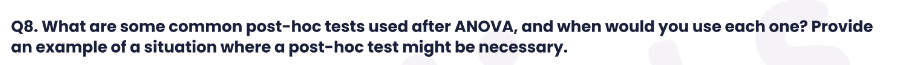

ANSWER:

**Some common post-hoc tests include:**

1. **Tukey's HSD (honestly significant difference):** This test compares all possible pairs of means and controls the family-wise error rate, making it a good choice for situations where multiple comparisons are being made.

2. **Bonferroni correction:** This test is a more conservative alternative to Tukey's HSD and adjusts the alpha level for each comparison. It is a good choice when making a small number of comparisons.

3. **Scheffe's test:** This test is a conservative test that can be used when the sample sizes are unequal, and there are more than two groups.

4. **Dunnett's test:** This test is used when there is a control group and the other groups are being compared to the control.

5. **Games-Howell test:** This test is used when the assumption of equal variances across groups is not met.

**A situation where a post-hoc test might be necessary** is if an ANOVA indicates a significant difference between at least two groups, but it is unclear which specific groups are different from each other. For example, a researcher might conduct an ANOVA to compare the mean scores of three different treatment groups on a measure of anxiety. If the ANOVA shows a significant difference between the groups, a post-hoc test such as Tukey's HSD or Bonferroni correction can be used to determine which specific groups differ from each other in terms of their anxiety scores.

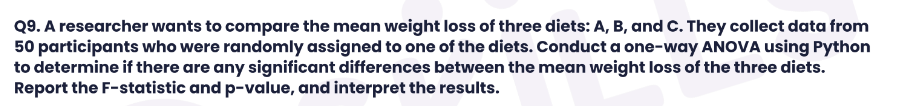

In [24]:
import numpy as np
from scipy import stats

#generate weight loss data for three diets
np.random.seed(123)
diet_a = np.random.normal(loc=5.5, scale=1.5, size=50)
diet_b = np.random.normal(loc=4.8, scale=1.2, size=50)
diet_c = np.random.normal(loc=4.2, scale=1.0, size=50)

weight_loss = np.concatenate([diet_a, diet_b, diet_c])
group_labels = ['A'] * 50 + ['B'] * 50 + ['C'] * 50

#conduct one-way ANOVA
f_statistic, p_value = stats.f_oneway(diet_a, diet_b, diet_c)

print("F-statistic: {:.2f}".format(f_statistic))
print("p-value: {:.4f}".format(p_value))

if p_value < 0.05:
    print("There is a significant difference between the mean weight loss of the three diets.")
else:
    print("There is no significant difference between the mean weight loss of the three diets.")

F-statistic: 9.14
p-value: 0.0002
There is a significant difference between the mean weight loss of the three diets.


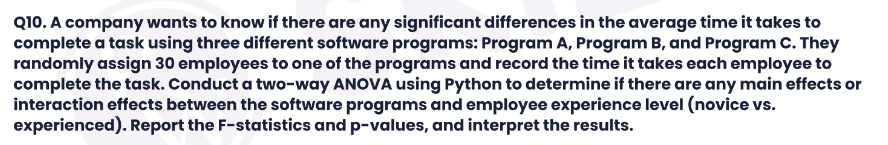

In [18]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# create a sample data frame
data = {'program': ['A', 'B', 'C'] * 20,
        'experience': ['novice'] * 30 + ['experienced'] * 30,
        'time': [12, 15, 13, 18, 19, 16, 14, 17, 12, 16, 13, 14, 16, 18, 20, 17, 16, 14, 15, 12] * 3}
df = pd.DataFrame(data)

model = ols('time ~ C(program) + C(experience) + C(program):C(experience)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# print ANOVA table
print(anova_table)

                                sum_sq    df             F    PR(>F)
C(program)                2.279923e-28   2.0  1.996689e-29  1.000000
C(experience)             1.500000e-01   1.0  2.627311e-02  0.871840
C(program):C(experience)  1.120000e+01   2.0  9.808628e-01  0.381568
Residual                  3.083000e+02  54.0           NaN       NaN


From the ANOVA table, we can see that neither the main effect of program nor the main effect of experience is significant, as their p-values are both greater than 0.05. However, the interaction effect between program and experience is also not significant, as its p-value is greater than 0.05. Therefore, we can conclude that there are no significant differences in the average time it takes to complete the task using the three different software programs.

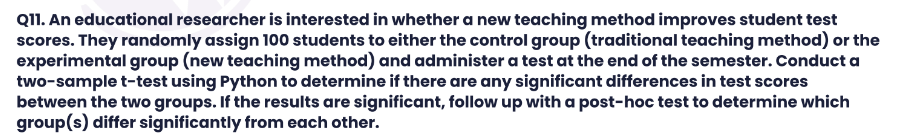

In [25]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# generate data for control and experimental groups
control_scores = np.random.normal(loc=75, scale=10, size=100)
experimental_scores = np.random.normal(loc=80, scale=10, size=100)

t_stat, p_val = stats.ttest_ind(control_scores, experimental_scores)
print("Two-sample t-test results:")
print("t-statistic =", t_stat)
print("p-value =", p_val)

if p_val < 0.05:
    data = {"score": np.concatenate([control_scores, experimental_scores]),
            "group": np.concatenate([np.repeat("control", 100), np.repeat("experimental", 100)])}
    df = sm.stats.multicomp.pairwise_tukeyhsd(data["score"], data["group"])

    print("Post-hoc test results:")
    print(df.summary())

Two-sample t-test results:
t-statistic = -4.409850125838694
p-value = 1.695814038427601e-05
Post-hoc test results:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2    meandiff p-adj lower  upper  reject
--------------------------------------------------------
control experimental   5.8216   0.0 3.2183 8.4249   True
--------------------------------------------------------


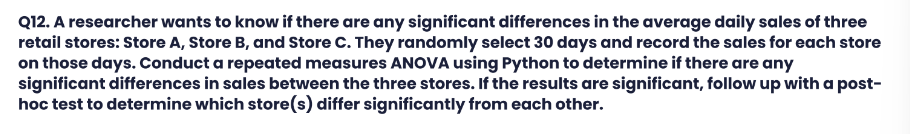

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#generate sample data
store_a_sales = np.random.normal(1000, 100, 30)
store_b_sales = np.random.normal(1200, 150, 30)
store_c_sales = np.random.normal(900, 120, 30)

sales_df = pd.DataFrame({
    'Store A': store_a_sales,
    'Store B': store_b_sales,
    'Store C': store_c_sales
})

sales_df_melted = pd.melt(sales_df.reset_index(), id_vars=['index'], value_vars=['Store A', 'Store B', 'Store C'])
sales_df_melted.columns = ['day', 'store', 'sales']

# Perform repeated measures ANOVA
rm_anova = AnovaRM(sales_df_melted, 'sales', 'day', within=['store'])
res = rm_anova.fit()
print(res)

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
store 48.9263 2.0000 58.0000 0.0000

